In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [92]:
df1=pd.read_csv("train.csv")
df1.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [93]:
df1.isnull().sum()

x    0
y    1
dtype: int64

In [94]:
vas=df1.isnull().stack()

In [95]:
print(vas[vas])

213  y    True
dtype: bool


In [96]:
df1["y"].mean()

49.9398691704578

In [97]:
df1.at[213, 'y'] = 49.93

In [98]:
df1.isnull().sum()

x    0
y    0
dtype: int64

In [99]:
df1.dtypes

x    float64
y    float64
dtype: object

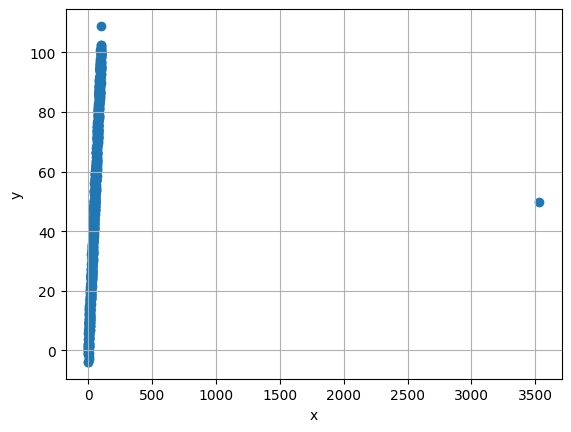

In [100]:
plt.scatter(x=df1["x"],y=df1["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [101]:
df1.x.max()

3530.15736917

In [102]:
df1["x"].describe()

count     700.000000
mean       54.985939
std       134.681703
min         0.000000
25%        25.000000
50%        49.000000
75%        75.000000
max      3530.157369
Name: x, dtype: float64

In [103]:
Q1 = df1['x'].quantile(0.25)
Q3 = df1['x'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [104]:
df_cleaned = df1[(df1['x'] >= lower_bound) & (df1['x'] <= upper_bound)]


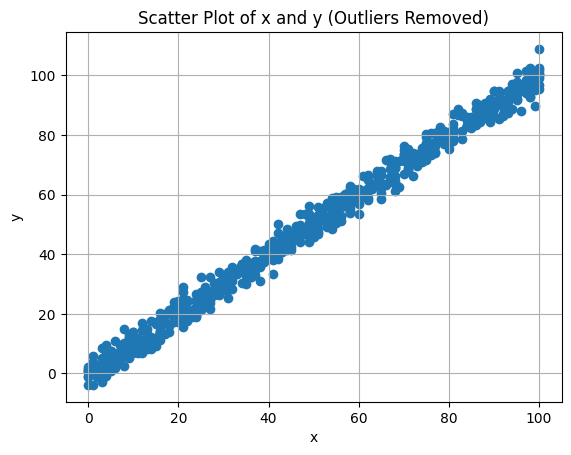

In [105]:
plt.scatter(df_cleaned['x'], df_cleaned['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y (Outliers Removed)')
plt.grid(True)
plt.show()

In [106]:
x=df_cleaned[['x']].values
y=df_cleaned['y'].values

In [107]:
df2=pd.read_csv("test.csv")

In [108]:
df2.isnull().sum()

x    0
y    0
dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=54)

In [110]:
from sklearn.linear_model import LinearRegression

In [113]:
model=LinearRegression()

In [114]:
model.fit(x_train,y_train)

LinearRegression()

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
mse

7.358284537808013

In [117]:
r2

0.9921091071542012

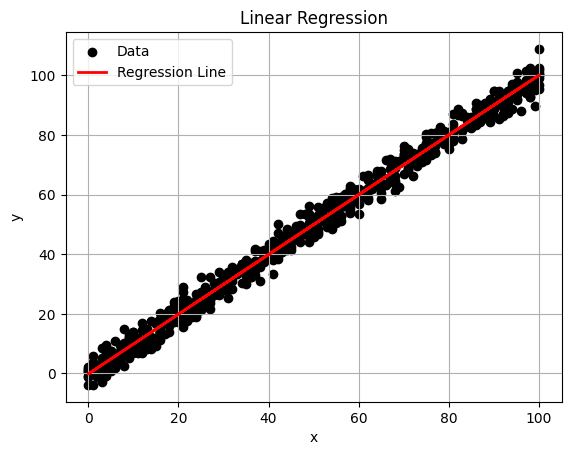

In [130]:
import matplotlib.pyplot as plt

# Plot the original data
plt.scatter(x, y, color='black', label='Data')

# Plot the regression line
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [122]:
model.coef_

array([1.00277157])

In [123]:
model.intercept_

-0.1913873762092564

In [128]:
unseen=np.array([[40]])
model.predict(unseen)

array([39.91947526])

In [133]:
import pickle
filename = 'linear_reg.sav'
pickle.dump(model, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score = load_model.score(x_test, y_test)
model_score

0.9921091071542012